In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy as stats

In [2]:
#Q2 Using the Boston data set from sklearn, find out the Outlier and treat them.
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston = pd.DataFrame(data = boston.data, columns= boston.feature_names)

In [5]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='AGE'>

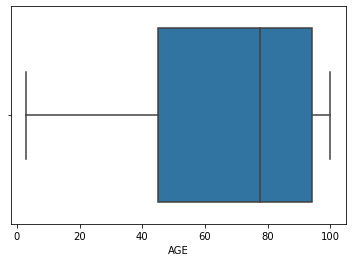

In [7]:
sns.boxplot(data=boston,x=boston['AGE'])

<AxesSubplot:xlabel='RM'>

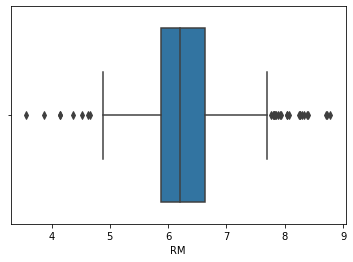

In [8]:
sns.boxplot(data=boston,x=boston.RM)

In [9]:
Q1 = boston.RM.quantile(q=0.25)
Q3 = boston.RM.quantile(q=0.75)
IQR = 1.5*(Q3-Q1)
Q1,Q3,IQR

(5.8855, 6.6235, 1.1069999999999993)

In [10]:
LW = Q1 - IQR
UW = Q3 + IQR
LW,UW

(4.778500000000001, 7.730499999999999)

In [11]:
boston.shape

(506, 13)

In [12]:
boston = boston[boston.RM < UW]
boston = boston[boston.RM > LW]
boston.shape

(476, 13)

<AxesSubplot:xlabel='RM'>

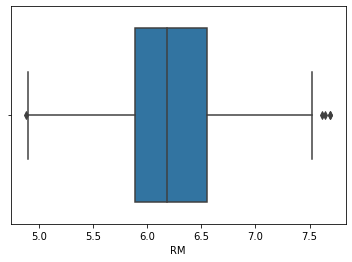

In [13]:
sns.boxplot(data=boston,x=boston.RM)

In [14]:
boston.RM.nunique

<bound method IndexOpsMixin.nunique of 0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64>

In [15]:
#Q1 Using the given MT cars dataset you need to find outlier with z score

In [16]:
mtcars = pd.read_csv("mtcars.csv")

In [17]:
from scipy.stats import ttest_1samp
import numpy as np

In [18]:
mtcars_mean = np.mean(mtcars.mpg)
print(mtcars_mean)
tset, pval = ttest_1samp(mtcars.mpg,20)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

20.090624999999996
p-values 0.9327606409093872
we are accepting null hypothesis


In [19]:
from statsmodels.stats import weightstats as stests

In [20]:
ztest ,pval = stests.ztest(mtcars.mpg, x2=None)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.5775868117147478e-79
reject null hypothesis
